In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('updated_table.csv')

In [3]:
df.drop(['updated_at', 'id', 'player_id'], axis=1, inplace=True)
column_rename = {
    'games': 'G',
    'pos': 'POS',
    'points': 'PTS',
    'rebounds': 'TRB',
    'assists': 'AST',
    'steals': 'STL',
    'blocks': 'BLK',
    'turnovers': 'TOV',
    'fg_percentage': 'FG%',
    'three_point_percentage': '3P%',
    'free_throw_percentage': 'FT%',
    'minutes': 'MP',
    'case_name': 'case_name'
}

df = df.rename(columns=column_rename)
df.head()

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,MP,case_name
0,1515,3,27.1,7.5,7.4,1.5,0.7,3.5,0.506,0.348,0.736,NaN,LeBron James
1,1346,2,25.0,5.2,4.7,1.4,0.5,3.0,0.447,0.329,0.837,NaN,Kobe Bryant
2,1072,2,30.1,6.2,5.3,2.3,0.8,2.7,0.497,0.327,0.835,NaN,Michael Jordan
3,1207,5,23.7,10.9,2.5,0.6,2.3,2.7,0.582,0.045,0.527,NaN,Shaquille O'Neal
4,861,1,25.1,4.2,6.7,1.0,0.3,2.8,0.438,0.371,0.898,NaN,Damian Lillard


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G          143 non-null    int64  
 1   POS        143 non-null    int64  
 2   PTS        143 non-null    float64
 3   TRB        143 non-null    float64
 4   AST        143 non-null    float64
 5   STL        143 non-null    float64
 6   BLK        143 non-null    float64
 7   TOV        143 non-null    float64
 8   FG%        143 non-null    float64
 9   3P%        143 non-null    float64
 10  FT%        143 non-null    float64
 11  MP         23 non-null     float64
 12  case_name  143 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 14.7+ KB


C:\Users\zohai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


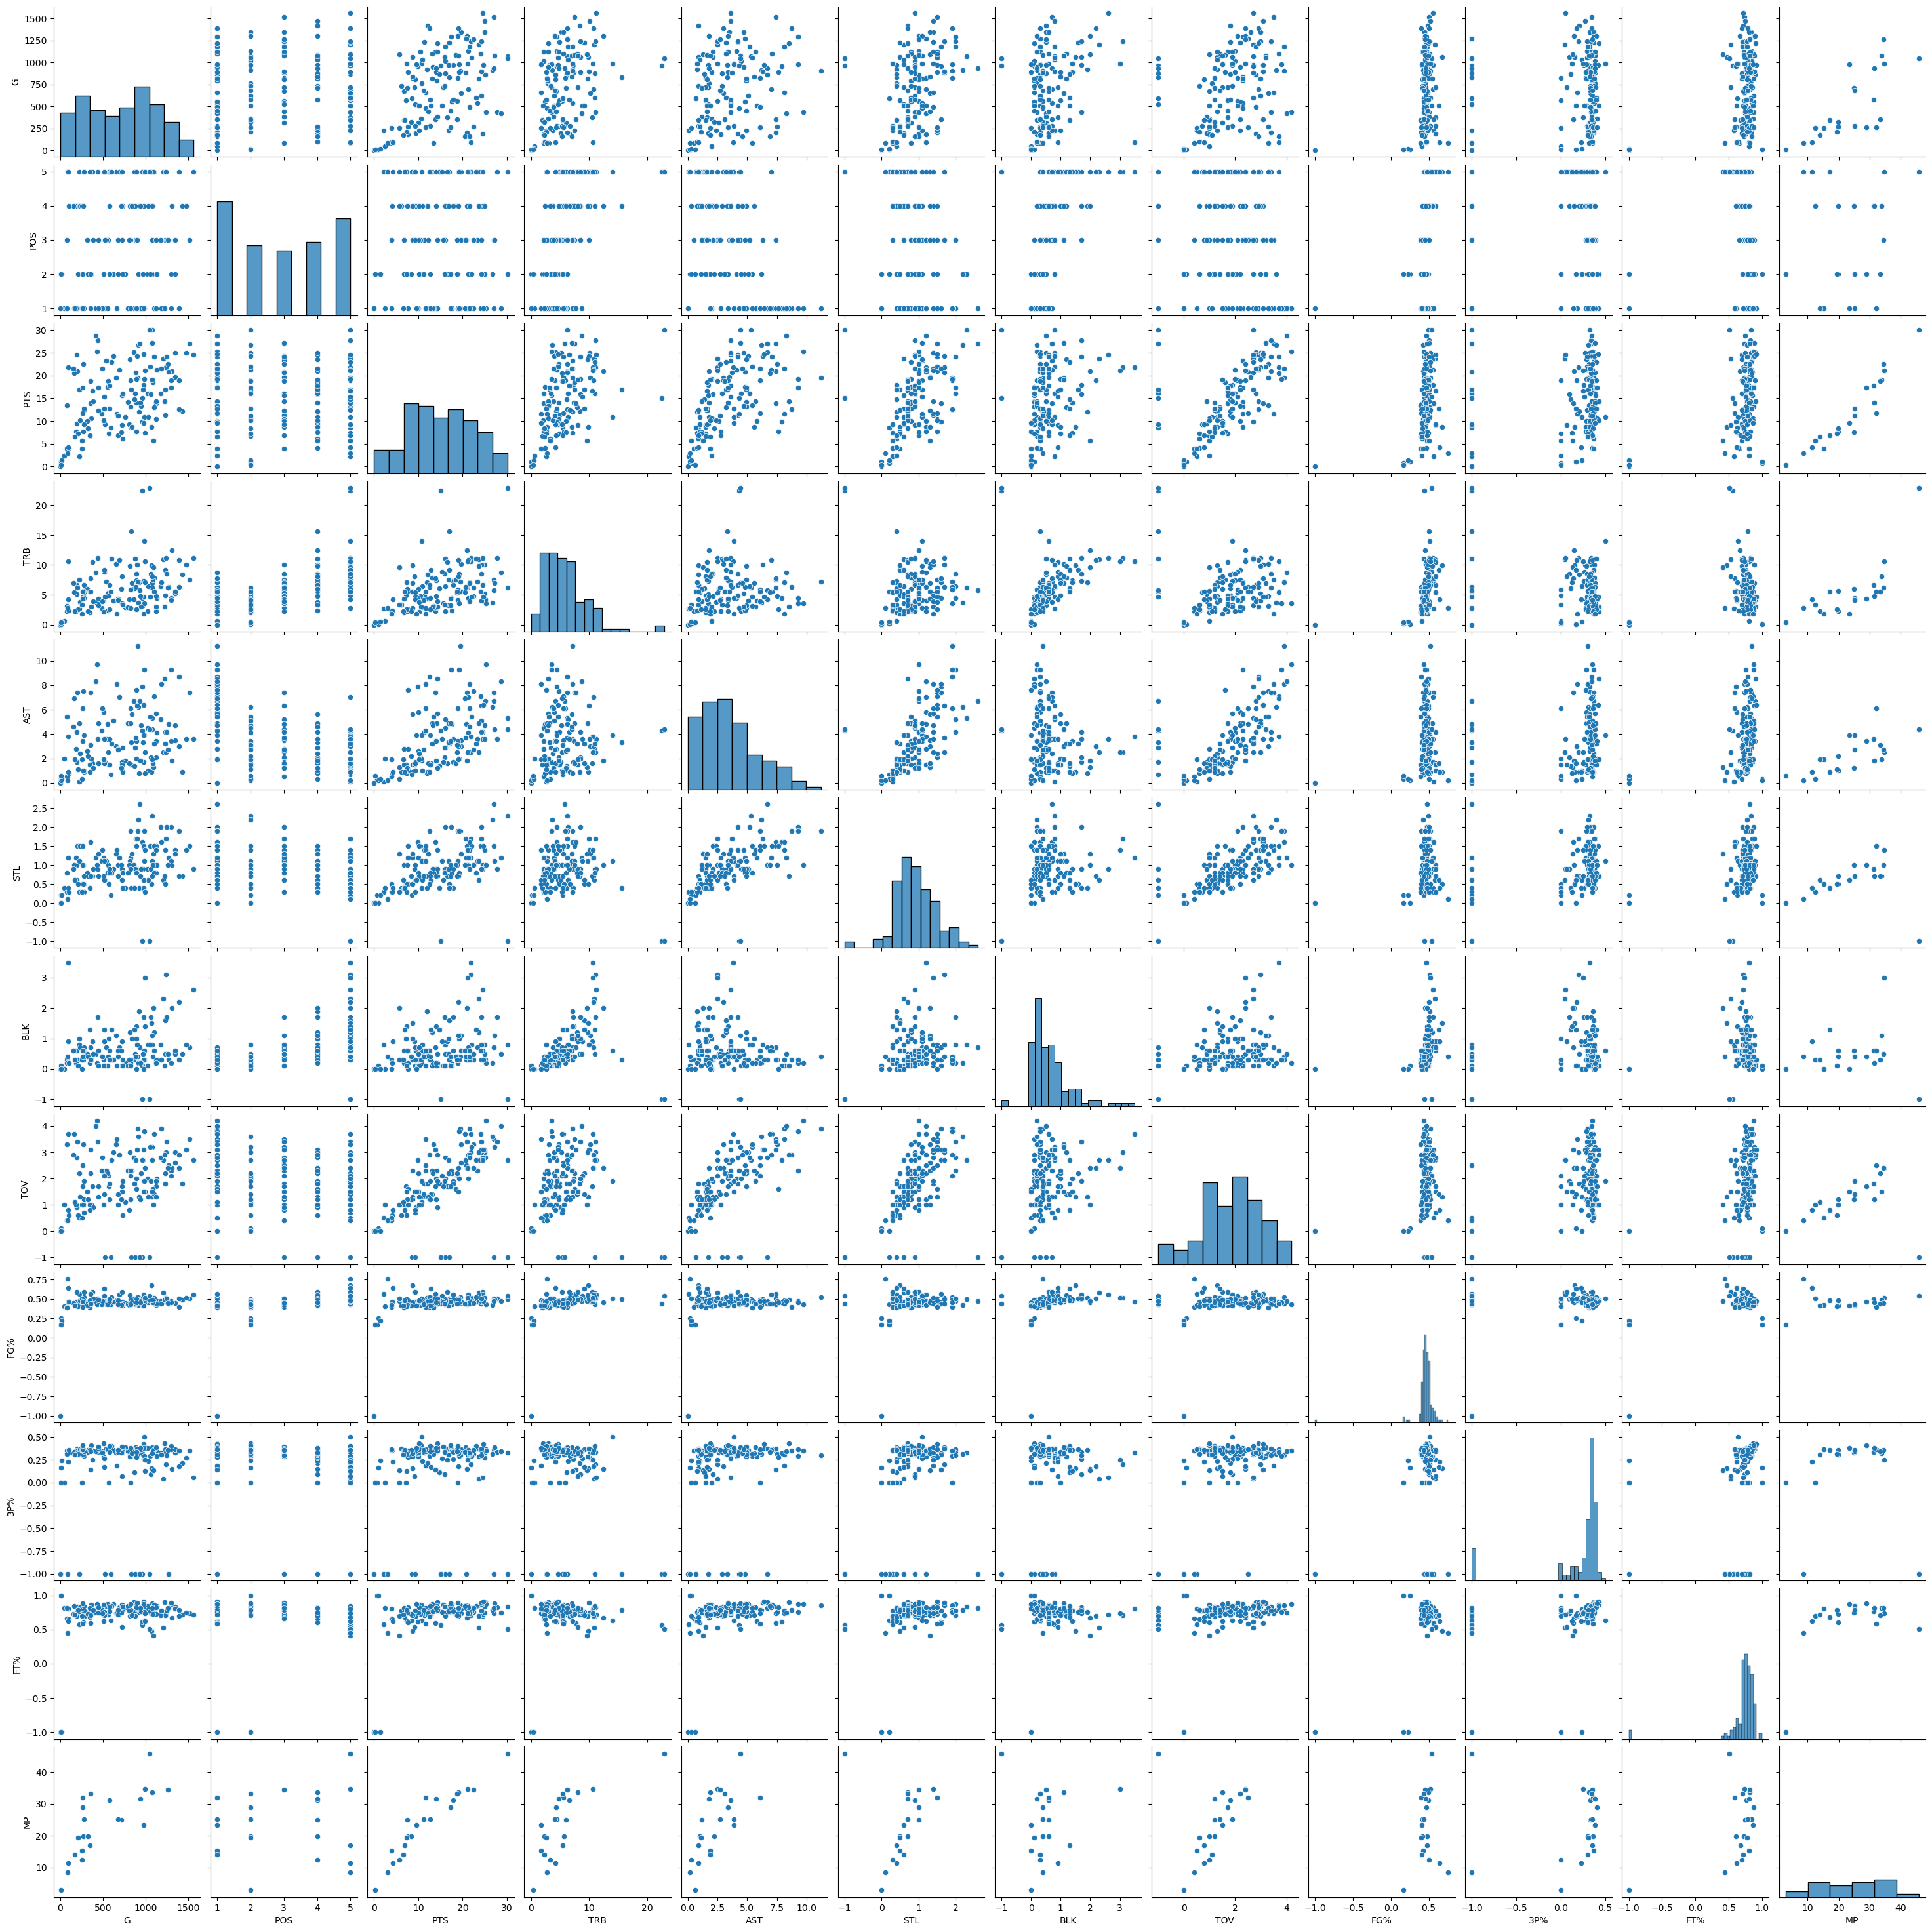

In [5]:
sns.pairplot(df)

In [6]:
df.describe()

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,MP
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,23.000000
mean,711.517483,2.923077,14.980420,5.874126,3.574126,0.937762,0.634266,1.861538,0.458140,0.202406,0.723434,23.695652
std,406.955804,1.538597,7.152752,3.637592,2.425327,0.551030,0.673242,1.168418,0.142553,0.362344,0.271477,10.299447
min,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.900000
25%,346.500000,1.000000,9.450000,3.250000,1.600000,0.600000,0.200000,1.150000,0.436000,0.244000,0.712000,16.150000
50%,730.000000,3.000000,14.300000,5.400000,3.200000,0.900000,0.400000,1.900000,0.463000,0.332000,0.767000,24.900000
75%,1037.500000,4.000000,20.900000,7.500000,4.900000,1.300000,0.800000,2.700000,0.499500,0.361000,0.826500,31.750000
max,1560.000000,5.000000,30.100000,22.900000,11.200000,2.600000,3.500000,4.200000,0.758000,0.500000,1.000000,45.800000


<Axes: >

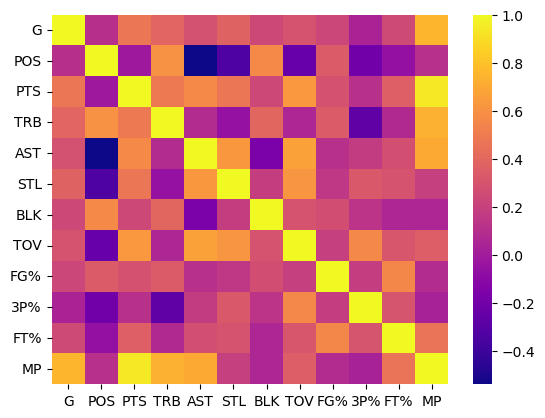

In [7]:
corr = df.drop(['case_name'],axis=1).corr()
sns.heatmap(corr, cmap='plasma')

C:\Users\zohai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zohai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='PTS', ylabel='AST'>

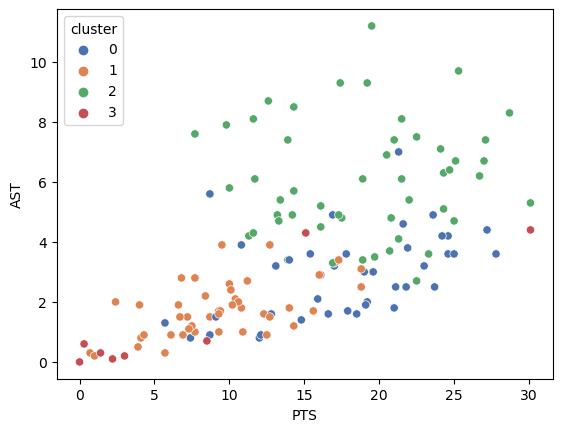

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

case_name_col = df['case_name']

cdf = df.drop(['case_name', 'MP'], axis=1)

# cdf['AST'] = cdf['AST'] * 1.4
# cdf['TRB'] = cdf['TRB'] * 1.2

cdf['FG%'] = cdf['FG%'] * 1.75
cdf['3P%'] = cdf['3P%'] * 1.75
cdf['FT%'] = cdf['FT%'] * 1.25

# cdf['TOV'] = cdf['TOV'] * 0.5

scaler = StandardScaler()
df_scaled = scaler.fit_transform(cdf)

kmeans = KMeans(n_clusters=4)

cdf['case_name'] = case_name_col
cdf['cluster'] = kmeans.fit_predict(df_scaled)


sns.scatterplot(data=cdf, x='PTS', y='AST', hue='cluster', palette='deep')

In [45]:
pd.set_option('display.max_rows', None)
cdf.head()

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,cluster,case_name
0,1515,3,27.1,7.5,7.4,1.5,0.7,3.5,0.88550,0.60900,0.92000,2,LeBron James
1,1346,2,25.0,5.2,4.7,1.4,0.5,3.0,0.78225,0.57575,1.04625,2,Kobe Bryant
2,1072,2,30.1,6.2,5.3,2.3,0.8,2.7,0.86975,0.57225,1.04375,2,Michael Jordan
3,1207,5,23.7,10.9,2.5,0.6,2.3,2.7,1.01850,0.07875,0.65875,0,Shaquille O'Neal
4,861,1,25.1,4.2,6.7,1.0,0.3,2.8,0.76650,0.64925,1.12250,2,Damian Lillard


In [40]:
cdf[cdf['cluster']==0]

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,cluster,case_name
3,1207,5,23.7,10.9,2.5,0.6,2.3,2.7,0.582,0.045,0.527,0,Shaquille O'Neal
11,437,5,27.8,11.1,3.6,0.9,1.7,3.4,0.503,0.339,0.827,0,Joel Embiid
12,1226,5,17.0,9.2,3.2,0.5,1.6,2.2,0.507,0.368,0.753,0,Pau Gasol
13,891,5,14.0,7.4,3.4,0.9,1.4,2.0,0.481,0.360,0.776,0,Marc Gasol
14,1064,5,8.7,9.9,0.9,0.5,1.5,1.3,0.674,0.154,0.475,0,DeAndre Jordan
16,654,5,19.6,10.2,3.0,1.3,1.1,3.3,0.460,0.331,0.737,0,DeMarcus Cousins
17,919,4,12.0,7.1,0.8,0.4,1.9,1.3,0.513,0.359,0.757,0,Serge Ibaka
18,1238,5,21.8,11.1,2.5,1.7,3.1,3.0,0.512,0.202,0.712,0,Hakeem Olajuwon
23,190,4,24.6,6.6,4.2,1.0,0.6,2.8,0.587,0.341,0.694,0,Zion Williamson
25,971,4,17.9,7.3,1.7,0.4,1.7,1.9,0.554,0.261,0.798,0,Kevin McHale


In [41]:
cdf[cdf['cluster']==1]

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,cluster,case_name
0,1515,3,27.1,7.5,7.4,1.5,0.7,3.5,0.506,0.348,0.736,1,LeBron James
1,1346,2,25.0,5.2,4.7,1.4,0.5,3.0,0.447,0.329,0.837,1,Kobe Bryant
2,1072,2,30.1,6.2,5.3,2.3,0.8,2.7,0.497,0.327,0.835,1,Michael Jordan
4,861,1,25.1,4.2,6.7,1.0,0.3,2.8,0.438,0.371,0.898,1,Damian Lillard
5,507,1,10.0,4.0,5.8,1.2,0.3,2.2,0.448,0.287,0.623,1,Elfrid Payton
6,1343,3,19.7,5.6,3.5,1.3,0.6,2.6,0.445,0.368,0.806,1,Paul Pierce
8,1123,1,13.9,2.2,3.4,0.8,0.2,1.7,0.419,0.351,0.842,1,Lou Williams
9,559,3,18.8,5.3,2.5,1.0,0.4,2.1,0.479,0.363,0.722,1,Jaylen Brown
10,536,3,23.3,7.2,3.6,1.1,0.7,2.3,0.460,0.375,0.841,1,Jayson Tatum
15,1129,2,21.3,4.4,4.1,1.0,0.3,2.0,0.469,0.296,0.841,1,DeMar DeRozan


In [42]:
cdf[cdf['cluster']==2]

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,cluster,case_name
7,762,2,10.8,2.9,1.8,0.4,0.2,1.1,0.450,0.386,0.825,2,Arron Afflalo
20,224,5,2.2,2.7,0.1,0.3,0.8,0.5,0.567,-1.000,0.578,2,Hasheem Thabeet
21,567,5,7.2,4.9,1.5,0.5,1.0,1.7,0.462,0.000,0.760,2,Luc Longley
32,590,5,8.5,5.5,0.7,0.2,0.3,-1.0,0.434,-1.000,0.630,2,Walt Wesley
34,1424,4,12.1,8.4,0.9,0.7,0.5,1.8,0.487,0.211,0.713,2,Kevin Willis
35,522,3,9.3,4.7,1.7,0.6,0.1,-1.0,0.438,-1.000,0.732,2,Dave Stallworth
36,875,4,16.1,11.0,2.9,0.9,0.5,-1.0,0.432,-1.000,0.699,2,Dave DeBusschere
37,829,4,17.0,15.6,3.3,0.4,0.3,-1.0,0.499,-1.000,0.783,2,Jerry Lucas
38,44,1,2.4,0.6,2.0,0.4,0.0,1.0,0.404,0.000,0.810,2,Billy Donovan
39,1030,4,10.9,6.4,1.0,0.6,0.8,1.3,0.455,0.238,0.790,2,Joe Smith


In [43]:
cdf[cdf['cluster']==3]

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,cluster,case_name
50,1,1,0.0,0.0,0.0,0.0,0.0,0.0,-1.000,-1.00,-1.0,3,JamesOn Curry
102,13,2,1.4,0.5,0.3,0.2,0.0,0.0,0.222,0.24,-1.0,3,Adam Flagler
132,7,2,0.3,0.4,0.6,0.0,0.0,0.0,0.167,0.00,-1.0,3,Joel Ayayi
